In [1]:
# Common
import os
import keras
import numpy as np

# Data
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Pre-Trained Model
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, MaxPooling2D, Flatten

2024-03-02 17:13:26.345611: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 17:13:26.379286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 17:13:26.379320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 17:13:26.380176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 17:13:26.385584: I tensorflow/core/platform/cpu_feature_guar

In [6]:
# Class Names
root_path = '/home/kkyu/amr_ws/DL/data/shapes/'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_names

['circles', 'squares', 'triangles']

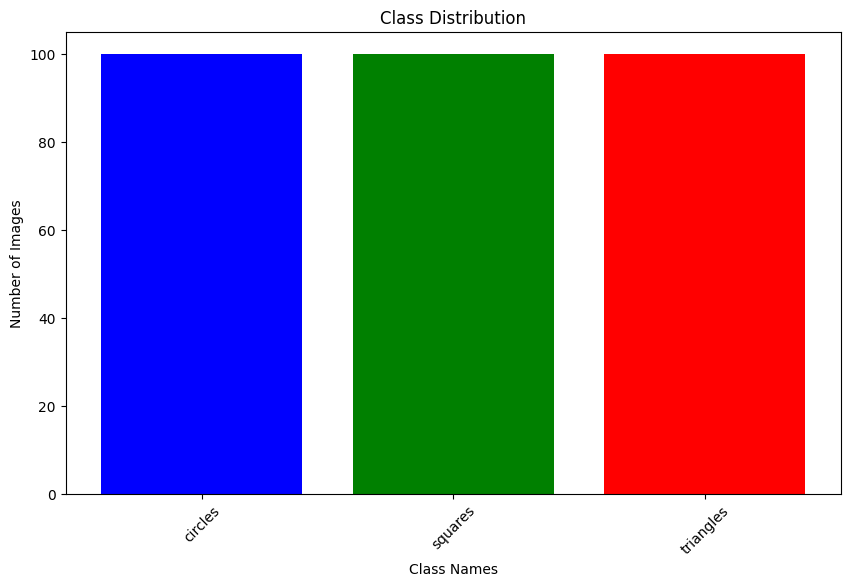

In [9]:
import matplotlib.pyplot as plt

# Define custom colors for the bars
colors = ['blue', 'green', 'red']  # Add more colors as needed

# Class Distribution
class_dis = [len(os.listdir(root_path + name)) for name in class_names]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_dis, color=colors)
plt.title('Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Initialize Generator
gen = ImageDataGenerator(rescale=1/255., validation_split=0.1)

# Load Data
train_ds = gen.flow_from_directory(root_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=8, subset='training')
valid_ds = gen.flow_from_directory(root_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=8, subset='validation')

Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [11]:
def show_images(GRID=[5,5], model=None, size=(20,20), data=train_ds):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows

    i = 1
    plt.figure(figsize=size)
    for images, labels in data:
        id = np.random.randint(len(images))
        image, label = images[id], class_names[int(labels[id])]

        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)

        if model is None:
            title = f"Class : {label}"
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"

        plt.title(title)
        plt.axis('off')

        i+=1
        if i>=(n_images+1):
            break

    plt.tight_layout()
    plt.show()

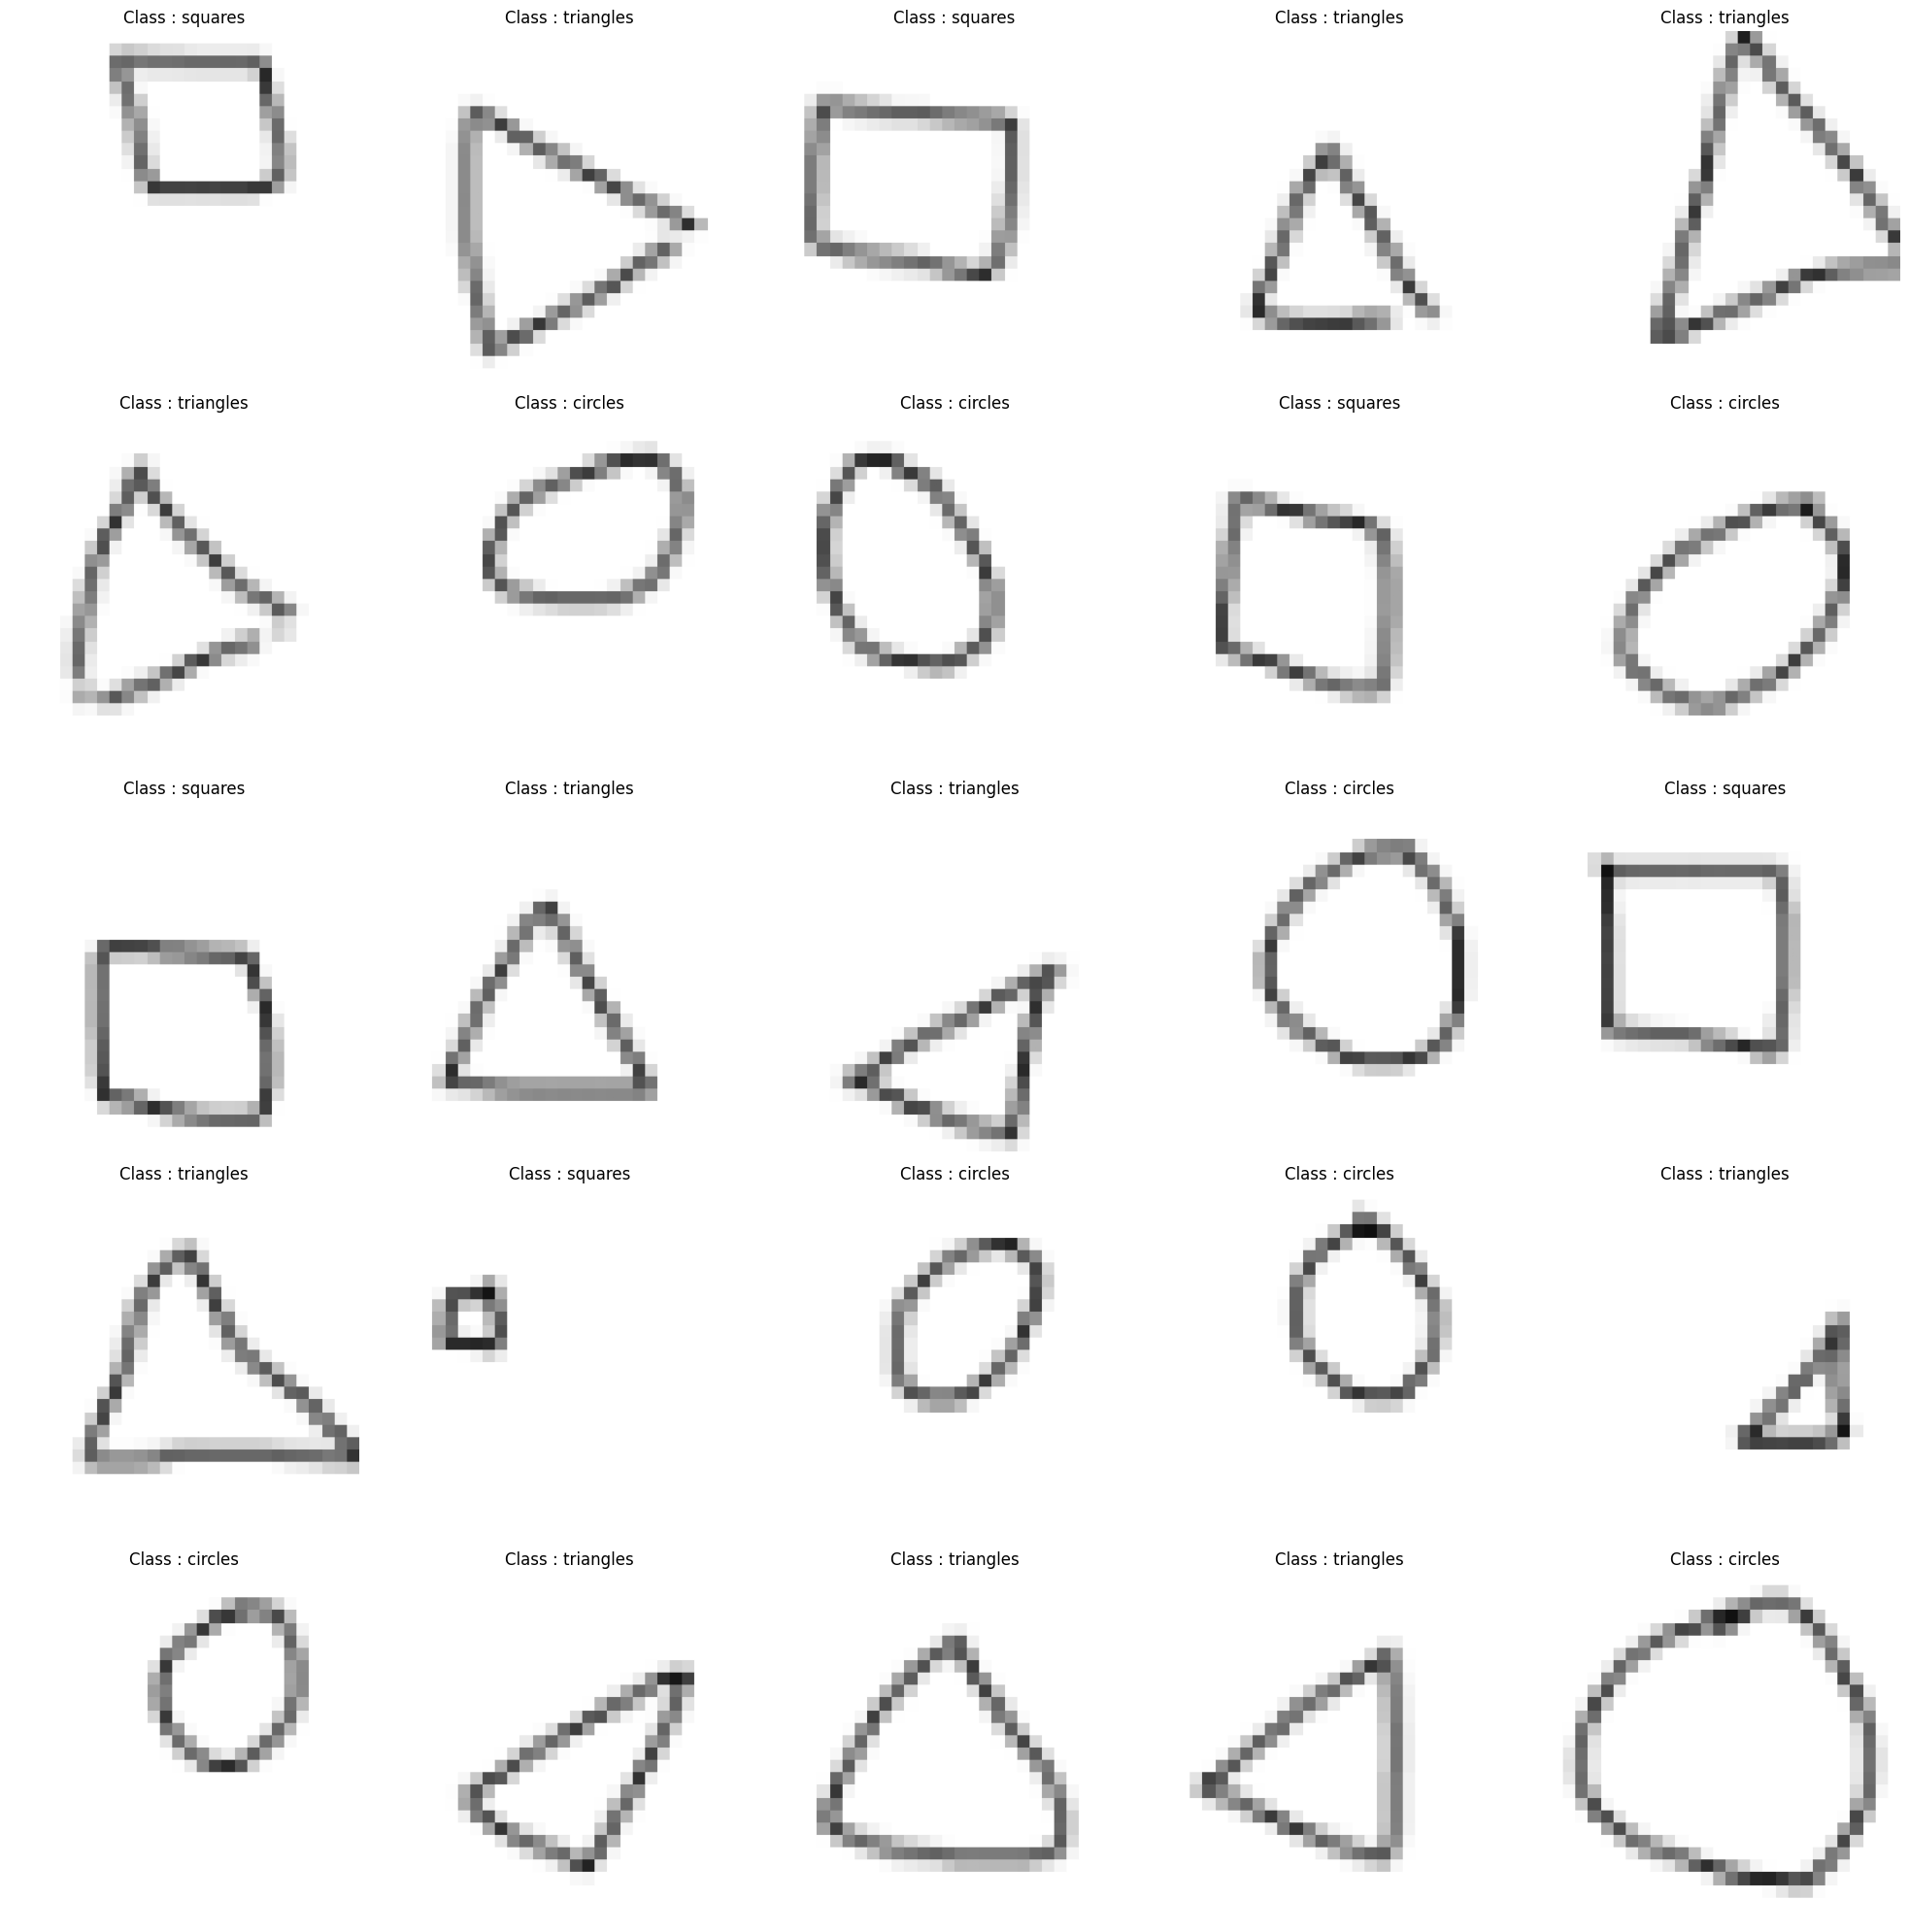

In [12]:
show_images()

In [13]:
BATCH_SIZE = 32
SPE = len(train_ds)//BATCH_SIZE

In [14]:
# Pre-Trained Model
base_model =  Xception(input_shape=(256,256,3), include_top=False)
base_model.trainable = False

# Model Architecture
name = "Xception_Shape_Detector_v2"
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(n_classes, activation='softmax')
], name=name)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

# Model Compiling
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
history = model.fit(train_ds, validation_data=valid_ds, callbacks=cbs, epochs=10)

2024-03-02 17:17:15.328484: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 17:17:15.429249: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 17:17:15.429427: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

83683744/83683744 [==============================] - 8s 0us/step
Epoch 1/10


2024-03-02 17:17:27.877679: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-02 17:17:29.549393: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2628003b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-02 17:17:29.549428: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-02 17:17:29.557084: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709367449.641019   20639 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9074

/home/kkyu/venv/deep_test/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



34/34 [==============================] - 7s 85ms/step - loss: 0.2309 - accuracy: 0.9074 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2/10
34/34 [==============================] - 2s 49ms/step - loss: 0.0157 - accuracy: 0.9889 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 2s 49ms/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 1s 39ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 2s 50ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 1s 39ms/step - loss: 3.4458e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 2s 49ms/step - loss: 5.6167e-04 - accuracy: 1.0000 - val_loss: 7.1884e-04 - val_accuracy: 1.0000
Epoch 8/10
3

In [16]:
# Load Model
model_path = '/home/kkyu/amr_ws/DL/src/Xception_Shape_Detector_v2.h5'
model = load_model(model_path)
model.summary()

Model: "Xception_Shape_Detector_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                        

1/1 [==============================] - 0s 18ms/step


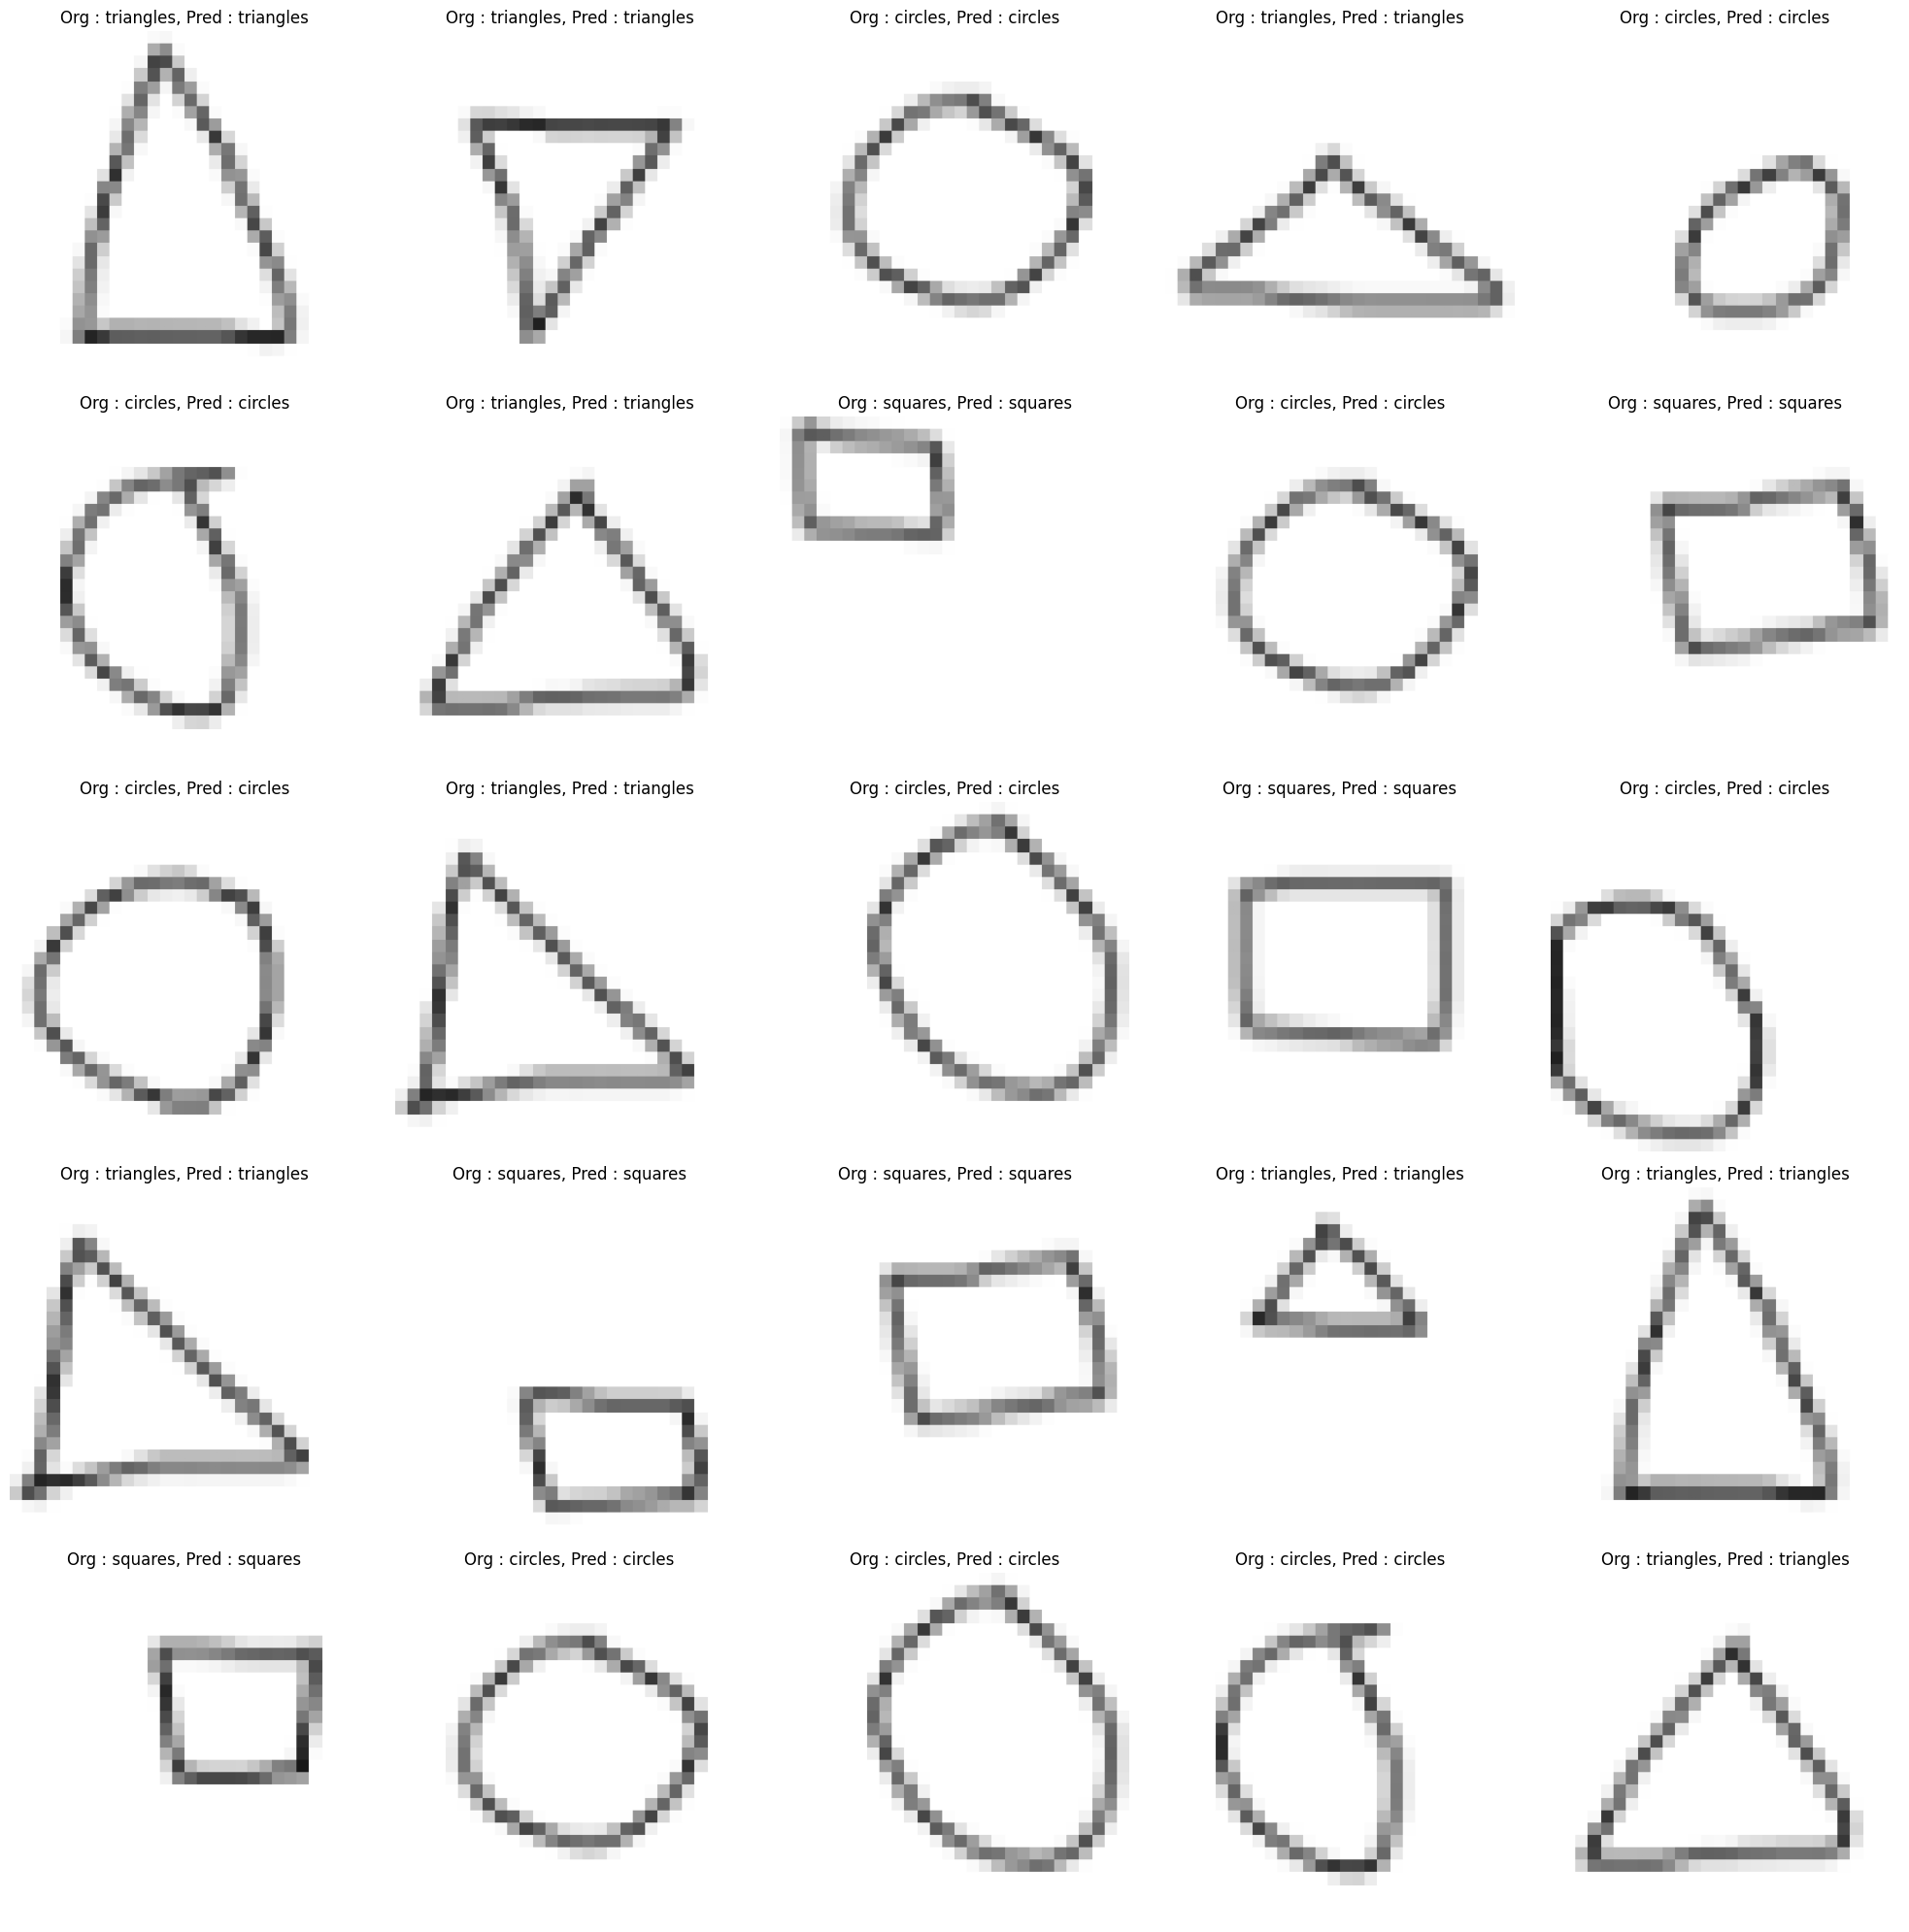

In [17]:
show_images(model=model, data=valid_ds)

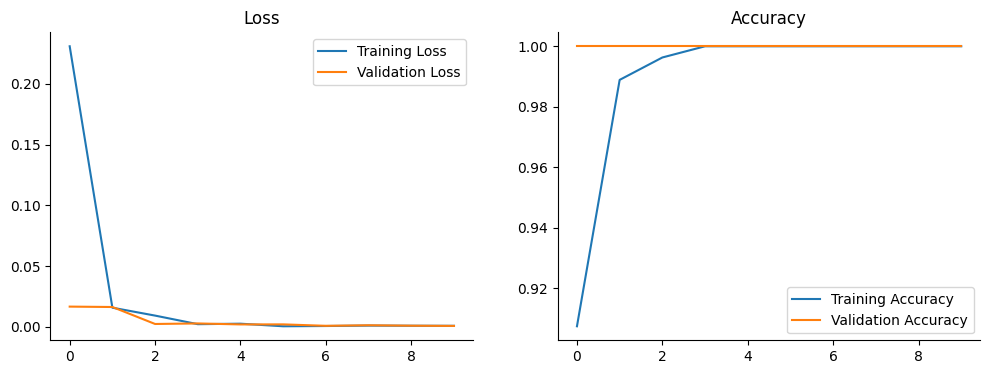

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 


fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["val_loss"], ax = axes[0],
             label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"], ax = axes[1],
             label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["val_accuracy"], ax = axes[1],
             label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")

sns.despine()
plt.show()